In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn import metrics 

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\adip2\Desktop\Project\stock_price.csv')

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.shape

(1009, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


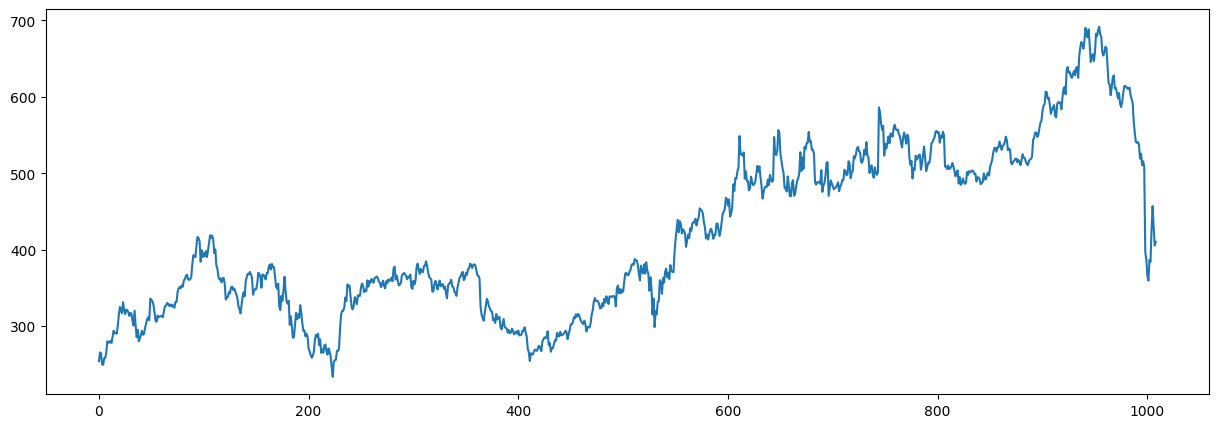

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.show()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
df[df['Close']==df['Adj Close']].shape

(1009, 7)

In [12]:
df = df.drop(['Adj Close'], axis=1)

In [13]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

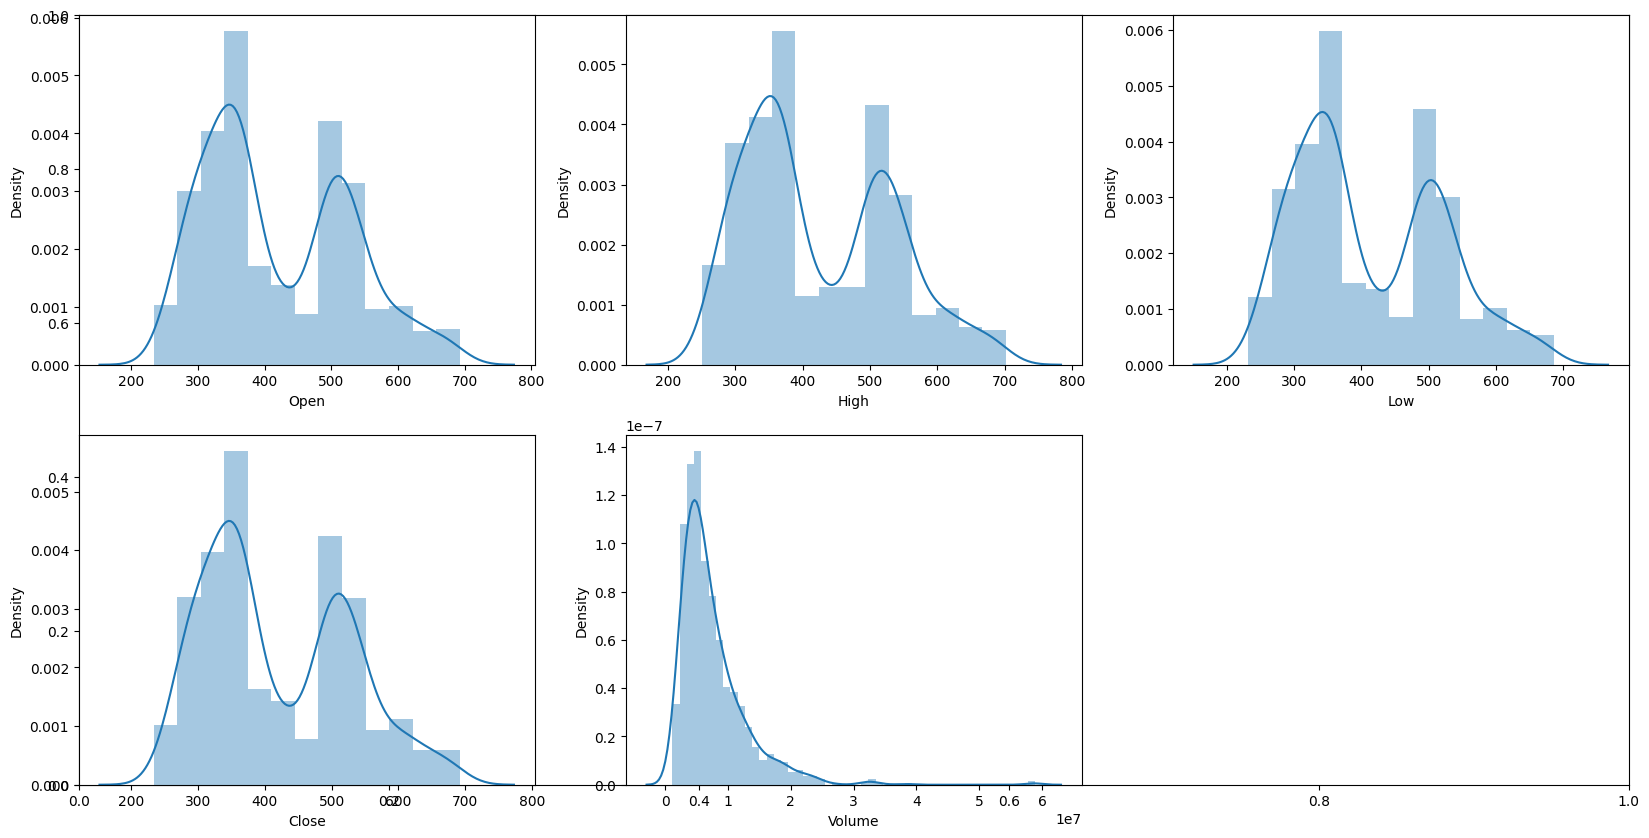

In [14]:
features = ['Open','High','Low','Close','Volume']

plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

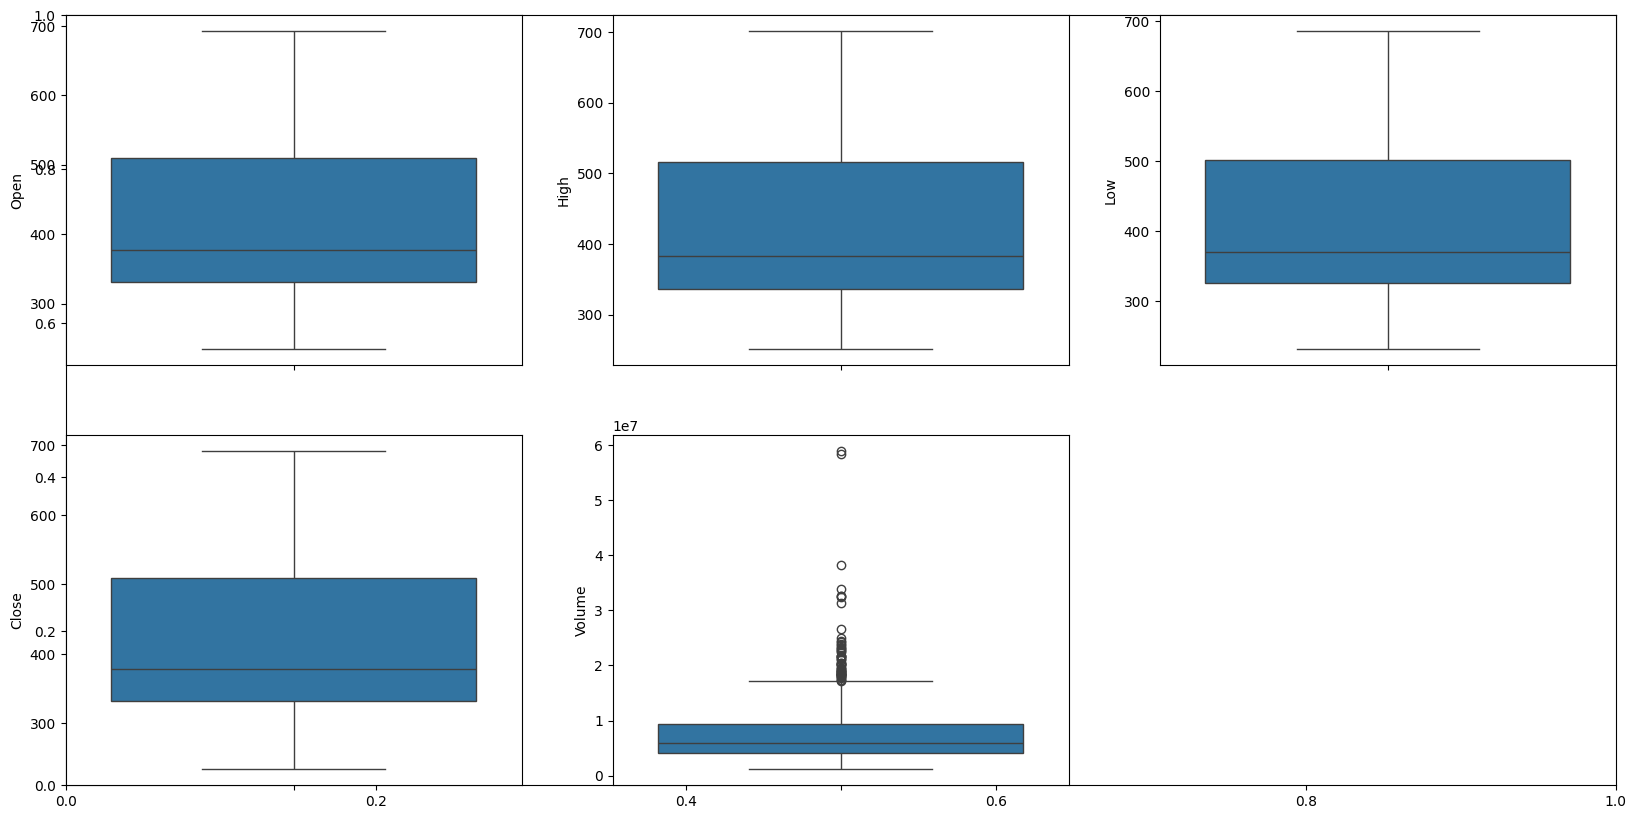

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [16]:
splitted = df['Date'].str.split('-', expand=True)
df['day']=splitted[2].astype('int')
df['month']=splitted[1].astype('int')
df['year']=splitted[0].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


In [17]:
df['is_quarter_end']=np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0


In [40]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)
X=df.iloc[:,:9]

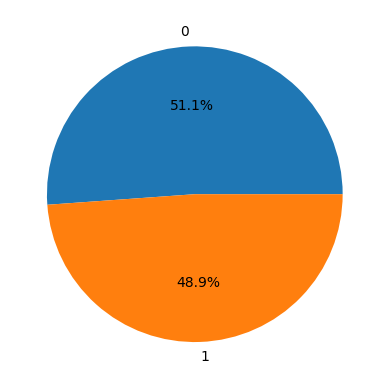

In [41]:
plt.pie(df['target'].value_counts().values,
        labels=[0,1], autopct='%1.1f%%')
plt.show()

In [42]:
features=df[['open-close','low-high','is_quarter_end']]
target=df['target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
split = int(0.7*len(df))
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state=2022)


In [43]:
print(X_train.shape, X_test.shape)

(908, 3) (101, 3)


In [44]:
models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]}:')
    print('Training Accuracy: ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:,1]))
    print()

LogisticRegression():
Training Accuracy:  0.5406284172924108
Validation Accuracy:  0.5406284172924108

SVC(kernel='poly', probability=True):
Training Accuracy:  0.5257515005710676
Validation Accuracy:  0.5257515005710676

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy: 

In [46]:
prob = model.predict_proba(X_test)
print(prob)

[[0.4952117  0.5047883 ]
 [0.49060203 0.50939797]
 [0.49978596 0.50021404]
 [0.45643765 0.54356235]
 [0.46560085 0.53439915]
 [0.44974449 0.55025551]
 [0.46208746 0.53791254]
 [0.52543748 0.47456252]
 [0.46977458 0.53022542]
 [0.4646506  0.5353494 ]
 [0.43076197 0.56923803]
 [0.46684623 0.53315377]
 [0.45144897 0.54855103]
 [0.49011715 0.50988285]
 [0.4956863  0.5043137 ]
 [0.53077855 0.46922145]
 [0.47558774 0.52441226]
 [0.4808651  0.5191349 ]
 [0.46114376 0.53885624]
 [0.56215882 0.43784118]
 [0.50793043 0.49206957]
 [0.48157338 0.51842662]
 [0.62347654 0.37652346]
 [0.46526728 0.53473272]
 [0.50606437 0.49393563]
 [0.51531681 0.48468319]
 [0.46070696 0.53929304]
 [0.4795026  0.5204974 ]
 [0.48380789 0.51619211]
 [0.53292424 0.46707576]
 [0.46927463 0.53072537]
 [0.51966734 0.48033266]
 [0.48354376 0.51645624]
 [0.42785845 0.57214155]
 [0.48424437 0.51575563]
 [0.46895994 0.53104006]
 [0.47804973 0.52195027]
 [0.43623333 0.56376667]
 [0.47272957 0.52727043]
 [0.45606809 0.54393191]


In [54]:
predict=model.predict(X_test)

In [48]:
print(metrics.classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.76      0.33      0.46        58
           1       0.49      0.86      0.62        43

    accuracy                           0.55       101
   macro avg       0.62      0.59      0.54       101
weighted avg       0.64      0.55      0.53       101



In [49]:
print(model.score(X_test, Y_test))

0.5544554455445545
